<a href="https://colab.research.google.com/github/x23425237/DeepLearning_GenAI/blob/main/AIG_LSTM_GRU_Finial_bharathi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AIG Monthly stock  - and LSTM
1. perform data pre-processing
2. split data train and test 60/40
3. Perform LSTM 50, LSTM -10 layer-1
4. Batchsize=8, droupout=20%,learning_rate=0.001,Activation = tanh, relu
5. Record test and validation loss
6. Record model accuracy metrics








In [ ]:
import numpy as np
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional,RepeatVector,TimeDistributed
from tensorflow.keras.optimizers import SGD
from tensorflow.random import set_seed
import tensorflow as tf
from tensorflow.keras import layers

set_seed(455)
np.random.seed(455)

In [ ]:
# read data aig.csv
data=pd.read_csv('AIG.csv')
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1973-01-02 00:00:00-05:00,14.271496,14.271496,14.271496,14.271496,0,0.0,0.0
1,1973-01-03 00:00:00-05:00,14.333817,14.333817,14.333817,14.333817,0,0.0,0.0
2,1973-01-04 00:00:00-05:00,14.167630,14.167630,14.167630,14.167630,0,0.0,0.0
3,1973-01-05 00:00:00-05:00,14.250727,14.250727,14.250727,14.250727,0,0.0,0.0
4,1973-01-08 00:00:00-05:00,14.209176,14.209176,14.209176,14.209176,0,0.0,0.0


In [ ]:
# selec
data_sub = data[['Date','Open', 'High', 'Low', 'Close', 'Volume']]
data_sub.head()




,Date,Open,High,Low,Close,Volume
0,1973-01-02 00:00:00-05:00,14.271496,14.271496,14.271496,14.271496,0
1,1973-01-03 00:00:00-05:00,14.333817,14.333817,14.333817,14.333817,0
2,1973-01-04 00:00:00-05:00,14.167630,14.167630,14.167630,14.167630,0
3,1973-01-05 00:00:00-05:00,14.250727,14.250727,14.250727,14.250727,0
4,1973-01-08 00:00:00-05:00,14.209176,14.209176,14.209176,14.209176,0


In [ ]:
data_sub.rename(columns={'Date':'DateTime'},inplace=True)

data_sub.head()

<ipython-input-4-b6e26b311a12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sub.rename(columns={'Date':'DateTime'},inplace=True)


,DateTime,Open,High,Low,Close,Volume
0,1973-01-02 00:00:00-05:00,14.271496,14.271496,14.271496,14.271496,0
1,1973-01-03 00:00:00-05:00,14.333817,14.333817,14.333817,14.333817,0
2,1973-01-04 00:00:00-05:00,14.167630,14.167630,14.167630,14.167630,0
3,1973-01-05 00:00:00-05:00,14.250727,14.250727,14.250727,14.250727,0
4,1973-01-08 00:00:00-05:00,14.209176,14.209176,14.209176,14.209176,0


In [ ]:
print(data_sub.dtypes)


DateTime     object
Open        float64
High        float64
Low         float64
Close       float64
Volume        int64
dtype: object


In [ ]:
data_sub['DateTime'] = pd.to_datetime(data_sub['DateTime'], utc=True)

<ipython-input-6-22e3dd3975cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sub['DateTime'] = pd.to_datetime(data_sub['DateTime'], utc=True)


In [ ]:
print(data_sub.dtypes)

DateTime    datetime64[ns, UTC]
Open                    float64
High                    float64
Low                     float64
Close                   float64
Volume                    int64
dtype: object


In [ ]:
#locate missing values
data_sub.isnull().sum()


,0
DateTime,0
Open,0
High,0
Low,0
Close,0
Volume,0


In [ ]:
# print max the min vlues in date
print(data_sub['DateTime'].max())
print(data_sub['DateTime'].min())

2023-09-21 04:00:00+00:00
1973-01-02 05:00:00+00:00


In [ ]:
# extreact only date into date column
data_sub['Date'] = data_sub['DateTime'].dt.date
data_sub['Year'] = data_sub['DateTime'].dt.year
data_sub.head()

<ipython-input-10-eecb87d7d957>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sub['Date'] = data_sub['DateTime'].dt.date


,DateTime,Open,High,Low,Close,Volume,Date,Year
0,1973-01-02 05:00:00+00:00,14.271496,14.271496,14.271496,14.271496,0,1973-01-02,1973
1,1973-01-03 05:00:00+00:00,14.333817,14.333817,14.333817,14.333817,0,1973-01-03,1973
2,1973-01-04 05:00:00+00:00,14.167630,14.167630,14.167630,14.167630,0,1973-01-04,1973
3,1973-01-05 05:00:00+00:00,14.250727,14.250727,14.250727,14.250727,0,1973-01-05,1973
4,1973-01-08 05:00:00+00:00,14.209176,14.209176,14.209176,14.209176,0,1973-01-08,1973


In [ ]:

date_counts = data_sub.groupby('Year').size()



<Axes: xlabel='Year'>

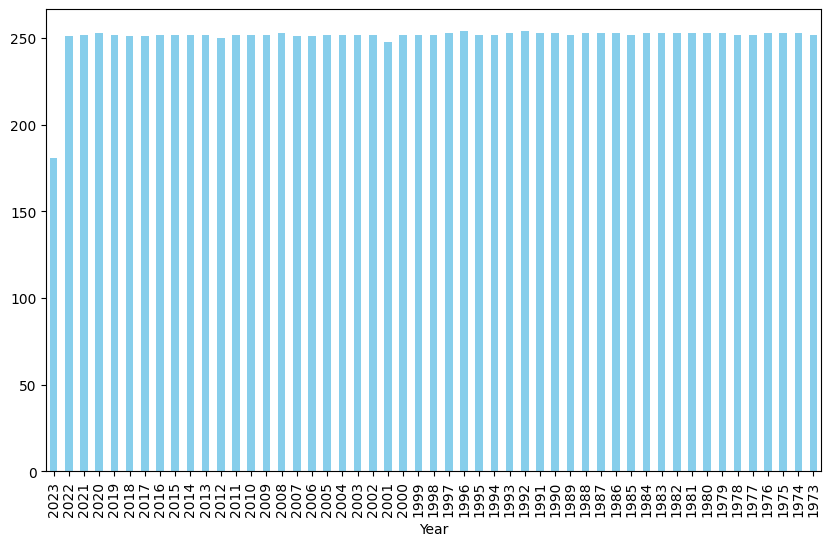

In [ ]:
# Sort the counts by year in descending order
date_counts_sorted = date_counts.sort_index(ascending=False)

# Plot the result
plt.figure(figsize=(10, 6))
date_counts_sorted.plot(kind='bar', color='skyblue')

In [ ]:
data_sub.set_index('DateTime',inplace=True)
data_sub.head()

,Open,High,Low,Close,Volume,Date,Year
DateTime,,,,,,,
1973-01-02 05:00:00+00:00,14.271496,14.271496,14.271496,14.271496,0,1973-01-02,1973
1973-01-03 05:00:00+00:00,14.333817,14.333817,14.333817,14.333817,0,1973-01-03,1973
1973-01-04 05:00:00+00:00,14.167630,14.167630,14.167630,14.167630,0,1973-01-04,1973
1973-01-05 05:00:00+00:00,14.250727,14.250727,14.250727,14.250727,0,1973-01-05,1973
1973-01-08 05:00:00+00:00,14.209176,14.209176,14.209176,14.209176,0,1973-01-08,1973


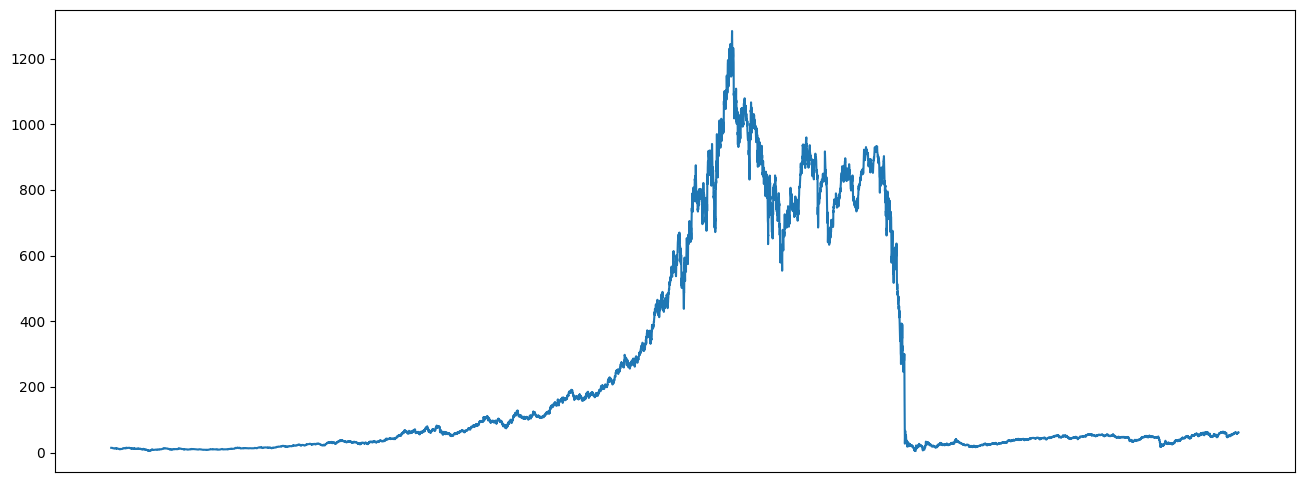

In [ ]:
# plot closing value, hide the x-axis
plt.figure(figsize=(16,6))
plt.plot(data_sub['Close'], label='Close Price history')
plt.xticks([])
plt.show()

In [ ]:
data_sub.head()

,Open,High,Low,Close,Volume,Date,Year
DateTime,,,,,,,
1973-01-02 05:00:00+00:00,14.271496,14.271496,14.271496,14.271496,0,1973-01-02,1973
1973-01-03 05:00:00+00:00,14.333817,14.333817,14.333817,14.333817,0,1973-01-03,1973
1973-01-04 05:00:00+00:00,14.167630,14.167630,14.167630,14.167630,0,1973-01-04,1973
1973-01-05 05:00:00+00:00,14.250727,14.250727,14.250727,14.250727,0,1973-01-05,1973
1973-01-08 05:00:00+00:00,14.209176,14.209176,14.209176,14.209176,0,1973-01-08,1973


In [ ]:
# Extract the relevant features (here we assume we're using 'Close' to predict 'Close')
features = data_sub[['Open', 'High', 'Low', 'Volume']].values
target = data_sub['Close'].values

In [ ]:
# Normalize the feature data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
features_scaled = scaler.fit_transform(features)

In [ ]:
# Normalize the target variable (Closing Price)
target_scaler = MinMaxScaler(feature_range=(-1, 1))
target_scaled = target_scaler.fit_transform(target.reshape(-1, 1))

In [ ]:
# Prepare the data for time-series prediction (X = features, y = target)
X = []
y = []

# we are telling the model to look back 60 datapoints to predict next day's closing price.
# values tested for 3 and 60

sequence_length = 60 #3 # Number of previous time steps to consider for prediction

for i in range(sequence_length, len(features_scaled)):
    X.append(features_scaled[i-sequence_length:i])  # Take the last `sequence_length` data points
    y.append(target_scaled[i])  # The corresponding closing price

In [ ]:
from sklearn.model_selection import train_test_split
X = np.array(X) # convert list to numpy array
y = np.array(y)

# Split the data into training and testing sets 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=False)

In [ ]:
# LSTM - 2 layers
#model = Sequential()



#model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))) # Uses tanh by default for the activation function
#model.add(LSTM(units=50))
#model.add(Dropout(0.2)) #20% of neurons will be droppedout or set to 0

In [ ]:
#LSTM - 1 layers
#model = Sequential()


#model.add(LSTM(units=10, input_shape=(X_train.shape[1], X_train.shape[2]))) # Uses tanh by default for the activation function
#model.add(Dropout(0.2)) #20% of neurons will be droppedout or set to 0

In [ ]:
#LSTM - 1 layers
model = Sequential()


model.add(LSTM(units=10, activation='relu',input_shape=(X_train.shape[1], X_train.shape[2])))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#GRU - one layer
#model = Sequential()


#model.add(GRU(units=50, input_shape=(X_train.shape[1], X_train.shape[2]))) # Uses tanh by default for the activation function
#model.add(Dropout(0.2)) #20% of neurons will be droppedout or set to 0

In [ ]:
print(X_train.shape)
print(y_train.shape) # 3241 in y train which is a good porting of training
print(X_test.shape)
print(y_test.shape)# 811 points in y-test

(7639, 60, 4)
(7639, 1)
(5093, 60, 4)
(5093, 1)


In [ ]:
from tensorflow.keras.optimizers import Adam

# Add a Dense layer to get the output prediction
model.add(Dense(units=1))



# Compile the model
#model.compile(optimizer=Adam(learning_rate=0.001),  metrics=['accuracy'])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_absolute_error')

In [ ]:
#Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 611 (2.39 KB)

 Trainable params: 611 (2.39 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history=model.fit(X_train, y_train, epochs=20, batch_size=8,validation_data=(X_test, y_test))

Epoch 1/20
955/955 ━━━━━━━━━━━━━━━━━━━━ 26s 25ms/step - loss: 0.0666 - val_loss: 0.0193
Epoch 2/20
955/955 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - loss: 0.0118 - val_loss: 0.0210
Epoch 3/20
955/955 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - loss: 0.0104 - val_loss: 0.0183
Epoch 4/20
955/955 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - loss: 0.0096 - val_loss: 0.0202
Epoch 5/20
955/955 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - loss: 0.0092 - val_loss: 0.0157
Epoch 6/20
955/955 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - loss: 0.0101 - val_loss: 0.0164
Epoch 7/20
955/955 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - loss: 0.0093 - val_loss: 0.0144
Epoch 8/20
955/955 ━━━━━━━━━━━━━━━━━━━━ 42s 24ms/step - loss: 0.0089 - val_loss: 0.0141
Epoch 9/20
955/955 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - loss: 0.0084 - val_loss: 0.0139
Epoch 10/20
955/955 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - loss: 0.0085 - val_loss: 0.0137
Epoch 11/20
955/955 ━━━━━━━━━━━━━━━━━━━━ 42s 24ms/step - loss: 0.0087 - val_loss: 0.0152
Epoch 12/20
955/955 ━━━━━━━━━━

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


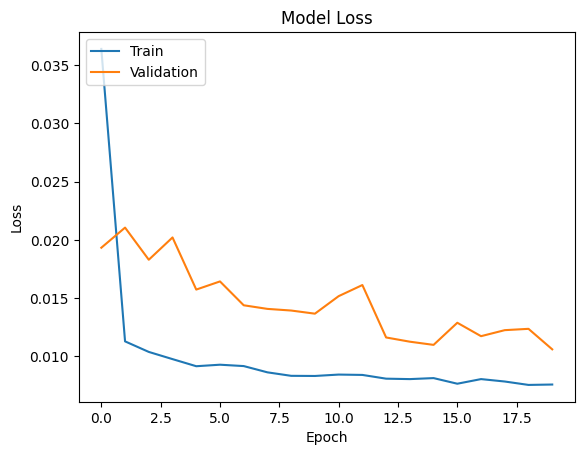

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Evaluate the performance of your LSTM model:
from sklearn.metrics import mean_absolute_error,mean_squared_error

# Predict on the test set
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Mean Absolute Error (MAE): 0.010603056457523997
Mean Squared Error (MSE): 0.00034240185691729585
Root Mean Squared Error (RMSE): 0.01850410378584426


In [ ]:
# Invert scaling for the actual and predicted closing prices
y_test_rescaled = target_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_rescaled = target_scaler.inverse_transform(y_pred)

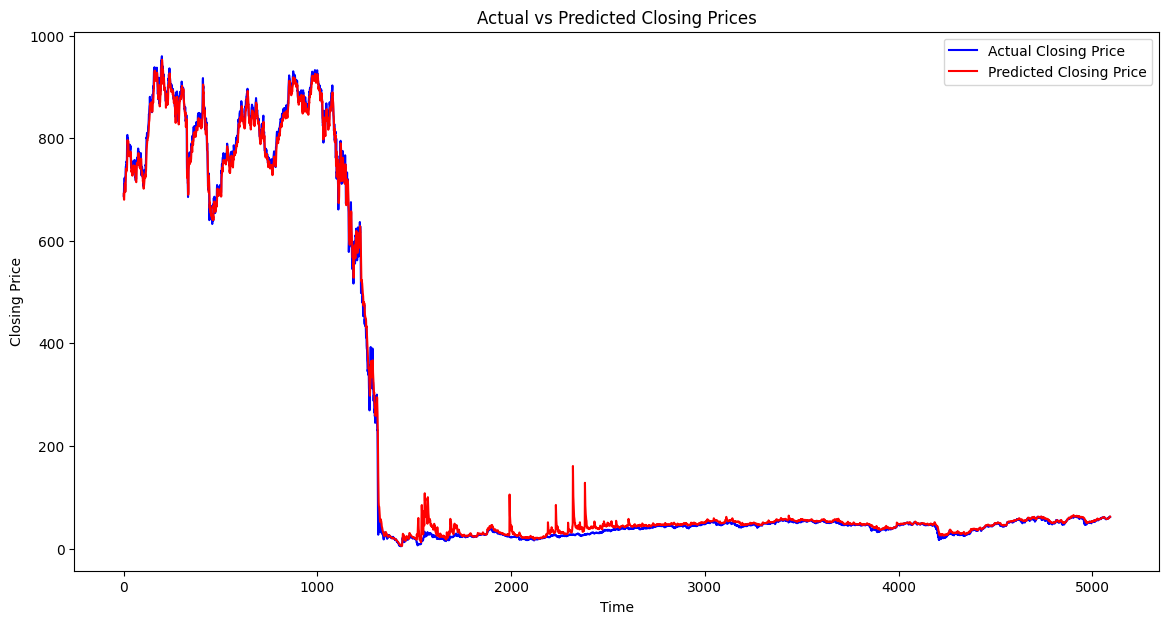

In [ ]:
# Plotting Actual vs Predicted closing prices
plt.figure(figsize=(14, 7))

# Plot actual closing prices
plt.plot(y_test_rescaled, color='blue', label='Actual Closing Price')

# Plot predicted closing prices
plt.plot(y_pred_rescaled, color='red', label='Predicted Closing Price')

plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [ ]:
y_pred_rescaled

array([[691.52356 ],
       [683.44684 ],
       [680.02515 ],
       ...,
       [ 61.512207],
       [ 61.827652],
       [ 62.25827 ]], dtype=float32)